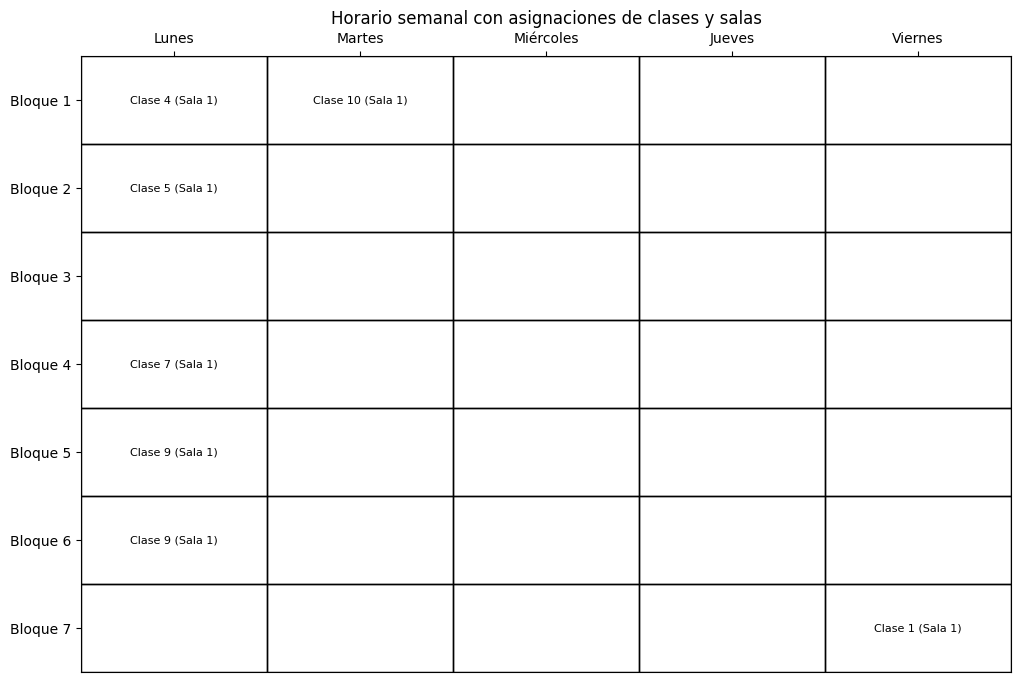

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#cargar y procesar el archivo de asignaciones
data = pd.read_csv("input.lp.csv", delimiter=';', names=["Variable", "MILP_Feasible", "Result"], skiprows=1)
data_x = data[data['Variable'].str.startswith('x', na=False)]
data_x = data_x[data_x['Result'] == 1]  #solo asignaciones activas

#extraer información de Asignatura, Bloque, Sala
data_x[['Asignatura', 'Bloque', 'Sala']] = data_x['Variable'].str.extract(r'x(\d+)_(\d+)_(\d+)').astype(int)

days = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
blocks = [f"Bloque {i+1}" for i in range(7)]

#crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

#matriz 7x5
num_rows = len(blocks)
num_cols = len(days)

#crear el cuadro del horario
for row in range(num_rows):
    for col in range(num_cols):
        ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=None, edgecolor="black"))

        block_number = row + 1 + (col * 7)  
        assignments = data_x[data_x['Bloque'] == block_number]
        
        if not assignments.empty:
            text_lines = [f"Clase {assignment['Asignatura']} (Sala {assignment['Sala']})" for idx, assignment in assignments.iterrows()]
            ax.text(col + 0.5, row + 0.5, "\n".join(text_lines), ha='center', va='center', fontsize=8)

#etiquetas días y bloques
ax.set_xticks(np.arange(num_cols) + 0.5)
ax.set_yticks(np.arange(num_rows) + 0.5)
ax.set_xticklabels(days)
ax.set_yticklabels(blocks)

#configurar límites
ax.set_xlim(0, num_cols)
ax.set_ylim(0, num_rows)
ax.invert_yaxis() 
ax.xaxis.tick_top() 

plt.title("Horario semanal con asignaciones de clases y salas")
plt.show()



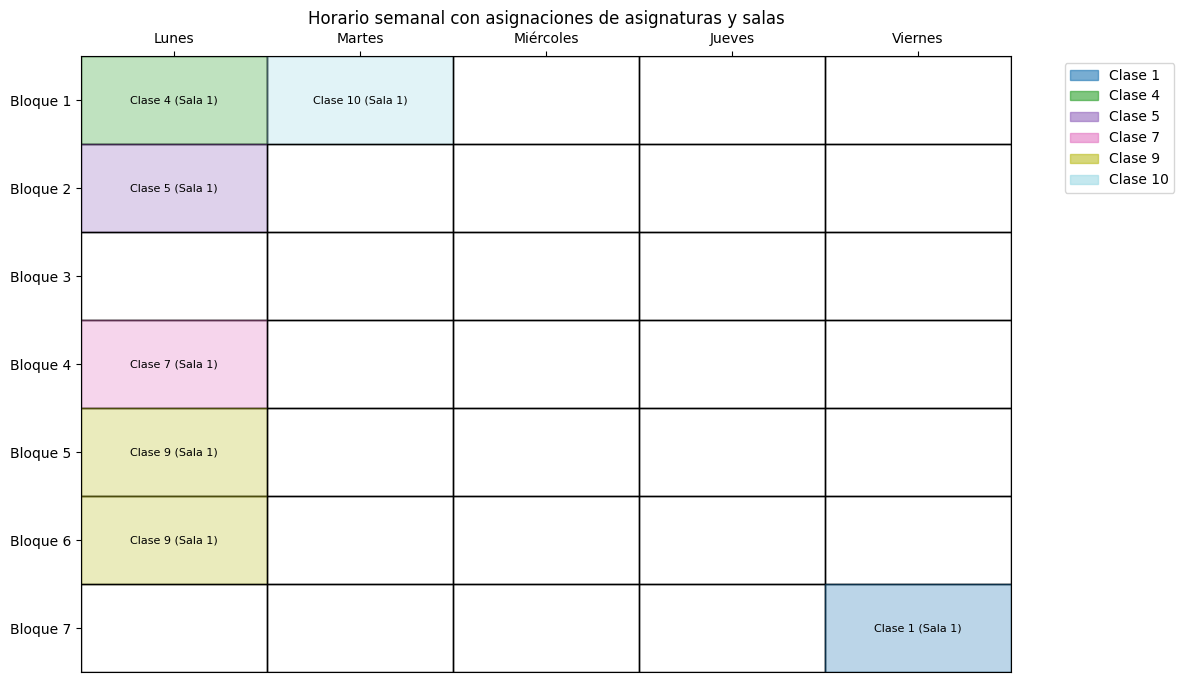

In [29]:
#calendario coloreado
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

#cargar y procesar el archivo de asignaciones
data = pd.read_csv("input.lp.csv", delimiter=';', names=["Variable", "MILP_Feasible", "Result"], skiprows=1)
data_x = data[data['Variable'].str.startswith('x', na=False)]
data_x = data_x[data_x['Result'] == 1]  #solo las asignaciones activas

#extraer información de asignatura, bloque, sala
data_x[['Asignatura', 'Bloque', 'Sala']] = data_x['Variable'].str.extract(r'x(\d+)_(\d+)_(\d+)').astype(int)

#asignar un color único a cada asignatura
asignaturas = data_x['Asignatura'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(asignaturas)))  # con esto creamos la paleta de colores
color_map = dict(zip(asignaturas, colors))  # asignar el color a cada asignatura

#definir los días de la semana y bloques horarios
days = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
blocks = [f"Bloque {i+1}" for i in range(7)]

#crear la figura
fig, ax = plt.subplots(figsize=(12, 8))

#matriz 7x5 para los bloques y días
num_rows = len(blocks)
num_cols = len(days)

# crear el cuadro de horario con los rectangulos y añadir las asignaciones
for row in range(num_rows):
    for col in range(num_cols):
        block_number = row + 1 + (col * 7)  # calcular el número de bloque basado en fila y columna
        assignments = data_x[data_x['Bloque'] == block_number]
        
        #contorno del bloque
        ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=None, edgecolor="black"))
        
        #si hay asignaciones, agregar texto de asignatura y sala en el bloque con su color
        if not assignments.empty:
            text_lines = []
            for idx, assignment in assignments.iterrows():
                asignatura_id = assignment['Asignatura']
                asignatura_text = f"Clase {asignatura_id} (Sala {assignment['Sala']})"
                text_lines.append(asignatura_text)
                
                #rellenar el bloque con el color de la asignatura
                ax.add_patch(plt.Rectangle((col, row), 1, 1, color=color_map[asignatura_id], alpha=0.3))

            #escribir el texto en el bloque
            ax.text(col + 0.5, row + 0.5, "\n".join(text_lines), ha='center', va='center', fontsize=8)

#etiquetas de los días y de los bloques
ax.set_xticks(np.arange(num_cols) + 0.5)
ax.set_yticks(np.arange(num_rows) + 0.5)
ax.set_xticklabels(days)
ax.set_yticklabels(blocks)

# configurar límites de los ejes
ax.set_xlim(0, num_cols)
ax.set_ylim(0, num_rows)
ax.invert_yaxis()  # invertir el eje Y para que los bloques empiecen desde arriba
ax.xaxis.tick_top()  # colocar los días en la parte superior

#leyenda de los colores para asignaturas                                #alpha=transparencia
handles = [mpatches.Patch(color=color_map[asig], label=f'Clase {asig}', alpha=0.6) for asig in asignaturas]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Horario semanal con asignaciones de asignaturas y salas")
plt.show()
